In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
def Leer_Datos( name, delmt = '\t',head = None):
    data = pd.read_csv(name,delimiter = delmt, header = head, dtype = np.float64)
    return data.values

def Normalizar_Datos( arraynp ):
    mean = np.mean(arraynp,0)
    standard = np.std(arraynp,0)
    for i in range(0,arraynp.shape[0]):
        arraynp[i] = np.true_divide((arraynp[i] - mean), standard)
    return arraynp

def Crear_Entrenamiento_Prueba( array):
    train , test = np.split(array,[int(0.7*len(array))])
    return train,test

In [3]:
def Calcular_Costo(X, Y, Theta):
    m = len(X)
    cost = np.sum((X.dot(Theta.T) - Y)**2) / (2 * m)
    return cost

def Gradiente_Descendiente(X, Y, Theta, iteraciones, tasa):
    costos = [0]*iteraciones
    m = len(X)
    for itr in range(iteraciones):
        h = X.dot(Theta.T)
        dif = h - Y
        derivada = (X.T).dot(dif) / m
        Theta = Theta - (tasa * derivada).T
        costos[itr] = Calcular_Costo(X, Y, Theta)
    return Theta, costos

def Ecuacion_Normal(X, Y):
    Theta = np.linalg.inv(X.T.dot(X))
    Theta = Theta.dot(X.T)
    Theta = Theta.dot(Y)
    return Theta.T

def MSE(Y_hat, Y):
#   Y_hat = X.dot(Theta.T)
    M = len(Y)
    return np.sum((Y_hat - Y)**2) / M

In [96]:
#   ex1data2(Home_1f).csv - Precio Viviendas
H_train_x = Leer_Datos("train/Home_train_X.csv")
H_train_y = Leer_Datos("train/Home_train_Y.csv")
H_test_x = Leer_Datos("test/Home_test_X.csv")
H_test_y = Leer_Datos("test/Home_test_Y.csv")

#   oceano_simple.csv - Temperatura Océano
O_train_x = Leer_Datos("train/Oceano_train_X.csv")
O_train_y = Leer_Datos("train/Oceano_train_Y.csv")
O_test_x = Leer_Datos("test/Oceano_test_X.csv")
O_test_y = Leer_Datos("test/Oceano_test_Y.csv")

#   petrol_consumption.csv - Consumo de Petróleo
P_train_x = Leer_Datos("train/Petroleo_train_X.csv")
P_train_y = Leer_Datos("train/Petroleo_train_Y.csv")
P_test_x = Leer_Datos("test/Petroleo_test_X.csv")
P_test_y = Leer_Datos("test/Petroleo_test_Y.csv")

##################### PRE-CALCULADO #####################
# train_x = Normalizar_Datos(train_x)
# train_y = Normalizar_Datos(train_y)
# test_x = Normalizar_Datos(test_x)
# test_y = Normalizar_Datos(test_y)

H_full_data = np.concatenate((np.concatenate((H_train_x,H_test_x)),
                              np.concatenate((H_train_y,H_test_y))),axis=1)
print ("Precio Vivienda\tMean:",np.mean(H_full_data,0),
       "\tSTD:",np.std(H_full_data,0))

O_full_data = np.concatenate((np.concatenate((O_train_x,O_test_x)),
                              np.concatenate((O_train_y,O_test_y))),axis=1)
print ("Temperatura Océano\tMean:",np.mean(O_full_data,0),
       "\tSTD:",np.std(O_full_data,0))

P_full_data = np.concatenate((np.concatenate((P_train_x,P_test_x)),
                              np.concatenate((P_train_y,P_test_y))),axis=1)
print ("Consumo Petróleo\tMean:",np.mean(P_full_data,0),
       "\tSTD:",np.std(P_full_data,0))

H_train_x = np.insert(H_train_x, 0, 1, axis=1)
H_test_x = np.insert(H_test_x, 0, 1, axis=1)
H_Theta = np.zeros(H_train_x.shape[1])[np.newaxis]

O_train_x = np.insert(O_train_x, 0, 1, axis=1)
O_test_x = np.insert(O_test_x, 0, 1, axis=1)
O_Theta = np.zeros(O_train_x.shape[1])[np.newaxis]

P_train_x = np.insert(P_train_x, 0, 1, axis=1)
P_test_x = np.insert(P_test_x, 0, 1, axis=1)
P_Theta = np.zeros(P_train_x.shape[1])[np.newaxis]

Precio Vivienda	Mean: [ 4.72435330e-18 -6.14165929e-17] 	STD: [1. 1.]
Temperatura Océano	Mean: [-3.82802202e-15  1.33046970e-16] 	STD: [1. 1.]
Consumo Petróleo	Mean: [ 4.07081776e-16  5.18104078e-16 -1.15648232e-16  1.67458640e-15
 -3.33066907e-16] 	STD: [1. 1. 1. 1. 1.]


In [97]:
#    Experimento 1
H_Theta_EN = Ecuacion_Normal(H_train_x,H_train_y)
O_Theta_EN = Ecuacion_Normal(O_train_x,O_train_y)
P_Theta_EN = Ecuacion_Normal(P_train_x,P_train_y)

mse_H = MSE(H_test_x.dot(H_Theta_EN.T),H_test_y)
mse_O = MSE(O_test_x.dot(O_Theta_EN.T),O_test_y)
mse_P = MSE(P_test_x.dot(P_Theta_EN.T),P_test_y)
df = pd.DataFrame({'Precio Vivienda':[mse_H],'Temperatura Océano':[mse_O],'Consumo Petróleo':[mse_P]})
print(df)                                        

   Precio Vivienda  Temperatura Océano  Consumo Petróleo
0         0.245661            0.114843           0.71144


In [98]:
#    Experimento 2
tasa_aprendizaje = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]#[0.4, 0.3, 0.2, 0.1, 0.05, 0.01]#
iteraciones = [500, 1000, 1500, 2000, 2500, 3000, 3500]#[3500,3000,2500,2000,1500,1000,500]#

matrix_MSE = np.zeros((len(tasa_aprendizaje),len(iteraciones)))

parametros = (0,0)
for ta in range(len(tasa_aprendizaje)):
    for itr in range(len(iteraciones)):
        cur_Theta, _ = Gradiente_Descendiente(H_train_x, H_train_y, H_Theta, iteraciones[itr], tasa_aprendizaje[ta])
        matrix_MSE[ta,itr] = MSE(H_test_x.dot(cur_Theta.T), H_test_y)
        if(matrix_MSE[ta,itr] < matrix_MSE[parametros[0],parametros[1]]):
            parametros = (ta, itr)
        
print("Precio Viviendas, menor MSE con:",tasa_aprendizaje[parametros[0]],iteraciones[parametros[1]])
print(pd.DataFrame(data = matrix_MSE, index= tasa_aprendizaje, columns = iteraciones))

parametros = (0,0)
for ta in range(len(tasa_aprendizaje)):
    for itr in range(len(iteraciones)):
        cur_Theta, _ = Gradiente_Descendiente(O_train_x, O_train_y, O_Theta, iteraciones[itr], tasa_aprendizaje[ta])
        matrix_MSE[ta,itr] = MSE(O_test_x.dot(cur_Theta.T),O_test_y)
        if(matrix_MSE[ta,itr] < matrix_MSE[parametros[0],parametros[1]]):
            parametros = (ta, itr)

print("\nTemperatura Océano, menor MSE con:",tasa_aprendizaje[parametros[0]],iteraciones[parametros[1]])
print(pd.DataFrame(data = matrix_MSE, index= tasa_aprendizaje, columns = iteraciones))

parametros = (0,0)
for ta in range(len(tasa_aprendizaje)):
    for itr in range(len(iteraciones)):
        cur_Theta, _ = Gradiente_Descendiente(P_train_x, P_train_y, P_Theta, iteraciones[itr], tasa_aprendizaje[ta])
        matrix_MSE[ta,itr] = MSE(P_test_x.dot(cur_Theta.T),P_test_y)
        if(matrix_MSE[ta,itr] < matrix_MSE[parametros[0],parametros[1]]):
            parametros = (ta, itr)
print("\nConsumo Petróleo, menor MSE con:",tasa_aprendizaje[parametros[0]],iteraciones[parametros[1]])
print(pd.DataFrame(data = matrix_MSE, index= tasa_aprendizaje, columns = iteraciones))

Precio Viviendas, menor MSE con: 0.01 500
          500       1000      1500      2000      2500      3000      3500
0.01  0.241804  0.245629  0.245661  0.245661  0.245661  0.245661  0.245661
0.05  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661
0.10  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661
0.20  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661
0.30  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661
0.40  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661  0.245661

Temperatura Océano, menor MSE con: 0.2 500
          500       1000      1500      2000      2500      3000      3500
0.01  0.115236  0.114845  0.114844  0.114843  0.114843  0.114843  0.114843
0.05  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843
0.10  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843
0.20  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843  0.114843
0.30  0.114843

Pesos con Gradiente Descendiente
[[0.04941133 0.93421781]]
Pesos con Ecuación Normal
[[0.04941133 0.93421781]]


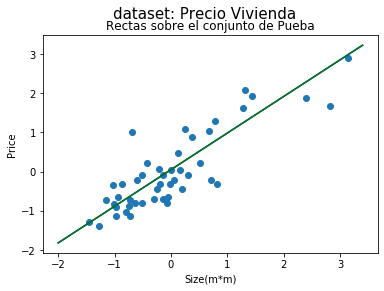

In [99]:
#    Experimento 3
plt.xlabel("Size(m*m)")
plt.ylabel("Price")
plt.suptitle("dataset: Precio Vivienda",fontsize=15)
plt.title("Rectas sobre el conjunto de Pueba")
all_points_x = np.concatenate((H_train_x,H_test_x))[:,1]
plt.scatter(all_points_x,np.concatenate((H_train_y, H_test_y)))

Theta_GD, _ = Gradiente_Descendiente(H_train_x, H_train_y, H_Theta, iteraciones[0], tasa_aprendizaje[3])
Theta_EN = Ecuacion_Normal(H_train_x, H_train_y)
print("Pesos con Gradiente Descendiente")
print(Theta_GD)
print("Pesos con Ecuación Normal")
print(Theta_EN)

X_rct = np.arange(-2,3.5,0.1)[np.newaxis].T
X_rct = np.insert(X_rct, 0, 1, axis=1)
Y_GD = X_rct.dot(Theta_GD.T)
Y_EN = X_rct.dot(Theta_EN.T)
plt.plot(X_rct[:,1],Y_GD,'-b')
plt.plot(X_rct[:,1],Y_EN,'-g')

Pesos con Gradiente Descendiente
[[-0.00692867 -0.89993647]]
Pesos con Ecuación Normal
[[-0.00967191 -0.90518797]]


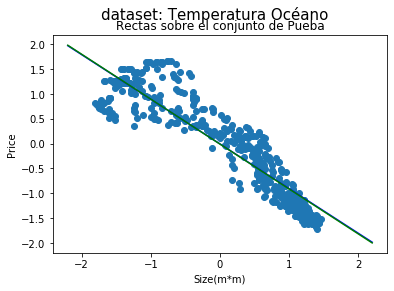

In [100]:
#    Experimento 3
plt.xlabel("Size(m*m)")
plt.ylabel("Price")
plt.suptitle("dataset: Temperatura Océano",fontsize=15)
plt.title("Rectas sobre el conjunto de Pueba")
all_points_x = np.concatenate((O_train_x,O_test_x))[:,1]
plt.scatter(all_points_x,np.concatenate((O_train_y, O_test_y)))

Theta_GD, _ = Gradiente_Descendiente(O_train_x, O_train_y, O_Theta, iteraciones[0], tasa_aprendizaje[0])
Theta_EN = Ecuacion_Normal(O_train_x, O_train_y)

print("Pesos con Gradiente Descendiente")
print(Theta_GD)
print("Pesos con Ecuación Normal")
print(Theta_EN)

X_rct = np.arange(-2.2,2.3,0.1)[np.newaxis].T
X_rct = np.insert(X_rct, 0, 1, axis=1)
Y_GD = X_rct.dot(Theta_GD.T)
Y_EN = X_rct.dot(Theta_EN.T)
plt.plot(X_rct[:,1],Y_GD,'-b')
plt.plot(X_rct[:,1],Y_EN,'-g')

Text(0, 0.5, 'Costo')

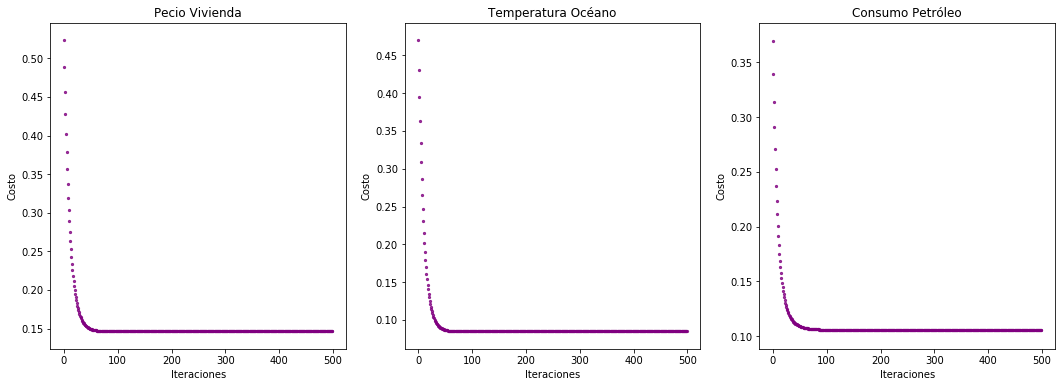

In [101]:
#    Experimento 4
fig, ax = plt.subplots(1,3,figsize=(18,6))

H_newTheta, costos = Gradiente_Descendiente(H_train_x, H_train_y, H_Theta, iteraciones[0], tasa_aprendizaje[1])
ax[0].scatter(np.arange(iteraciones[0]),costos,alpha=0.8, c="purple", s=5)
ax[0].set_title("Pecio Vivienda")
ax[0].set_xlabel('Iteraciones')
ax[0].set_ylabel('Costo')

O_newTheta, costos = Gradiente_Descendiente(O_train_x, O_train_y, O_Theta, iteraciones[0], tasa_aprendizaje[1])
ax[1].scatter(np.arange(iteraciones[0]),costos,alpha=0.8, c="purple", s=5)
ax[1].set_title("Temperatura Océano")
ax[1].set_xlabel('Iteraciones')
ax[1].set_ylabel('Costo')

P_newTheta, costos = Gradiente_Descendiente(P_train_x, P_train_y, P_Theta, iteraciones[0], tasa_aprendizaje[1])
ax[2].scatter(np.arange(iteraciones[0]),costos,alpha=0.8, c="purple", s=5)
ax[2].set_title("Consumo Petróleo")
ax[2].set_xlabel('Iteraciones')
ax[2].set_ylabel('Costo')

In [102]:
#    Comparación entre el trabajo desarrollado y LinearRegression() de la libreria sklearn

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(H_train_x, H_train_y)
print ("Dataset: Precio Vivienda")
print ("Con sklearn:\t", reg.coef_)
print ("Scratch GD:\t", H_newTheta)
print ("Scratch EN:\t", H_Theta_EN)
print ("MSE de los theta entre sklearn y Scratch GD:",MSE(H_newTheta,reg.coef_))
print ("MSE de los theta entre sklearn y Scratch EN:",MSE(H_Theta_EN,reg.coef_),"\n")

reg = LinearRegression().fit(O_train_x, O_train_y)
print ("Dataset: Temperatura Océano")
print ("Con sklearn:\t",  reg.coef_)
print ("Scratch GD:\t", O_newTheta)
print ("Scratch EN:\t", O_Theta_EN)
print ("MSE de los theta entre sklearn y Scratch GD:",MSE(O_newTheta,reg.coef_))
print ("MSE de los theta entre sklearn y Scratch EN:",MSE(O_Theta_EN,reg.coef_),"\n")

reg = LinearRegression().fit(P_train_x, P_train_y)
print ("Dataset: Consumo Pretóleo")
print ("Con sklearn:\t", reg.coef_)
print ("Scratch GD:\t", P_newTheta)
print ("Scratch EN:\t", P_Theta_EN)
print ("MSE de los theta entre sklearn y Scratch GD:",MSE(P_newTheta,reg.coef_))
print ("MSE de los theta entre sklearn y Scratch EN:",MSE(P_Theta_EN,reg.coef_),"\n")

Dataset: Precio Vivienda
Con sklearn:	 [[0.         0.93421781]]
Scratch GD:	 [[0.04941133 0.93421781]]
Scratch EN:	 [[0.04941133 0.93421781]]
MSE de los theta entre sklearn y Scratch GD: 0.0024414799220333567
MSE de los theta entre sklearn y Scratch EN: 0.002441479921680216 

Dataset: Temperatura Océano
Con sklearn:	 [[ 0.         -0.90518797]]
Scratch GD:	 [[-0.00967191 -0.90518797]]
Scratch EN:	 [[-0.00967191 -0.90518797]]
MSE de los theta entre sklearn y Scratch GD: 9.354576155511217e-05
MSE de los theta entre sklearn y Scratch EN: 9.354576199953229e-05 

Dataset: Consumo Pretóleo
Con sklearn:	 [[ 0.         -0.09203601 -0.36687041  0.1072892   0.64775736]]
Scratch GD:	 [[-0.087502   -0.0921195  -0.36686069  0.10721978  0.64772793]]
Scratch EN:	 [[-0.08752625 -0.09203601 -0.36687041  0.1072892   0.64775736]]
MSE de los theta entre sklearn y Scratch GD: 0.007656612096665259
MSE de los theta entre sklearn y Scratch EN: 0.0076608436746581215 

